# Model Training

In [2]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, train_lstm_model, train_cnn_model
from src.utils import plot_training_history
from src.evaluation import evaluate_regression_model, evaluate_classification_model

# Load the default configuration
config = Config()

## LSTM

2025-03-20 12:08:59,986 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8


2025-03-20 12:08:59,988 - INFO - Input shape derived from X_train: (120, 1)
2025-03-20 12:09:00,134 - INFO - LSTM model built with tuned config: Config(project_name='Experiment1', data_path='data/raw/Degradation_Prediction_Dataset_ISEA.mat', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=120, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 300, 400, 500, 600, 700, inf], labels=['0-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=16, lstm_dropout_rate=0.1, lstm_dense_units=8, learning_rate=0.01, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=11, conv2_filters=64, conv2_kernel_size=7, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64, cnn_dropout_rate=0.2)


Loaded best hyperparameters from experiments/hyperparameter_tuning/Experiment1_lstm_regression_tuning_eol80_best_params.json: {'lstm_units': 16, 'lstm_dropout_rate': 0.1, 'lstm_dense_units': 8, 'learning_rate': 0.01, 'clipnorm': 1.0}
Epoch 1/50
483/484 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0218 - mae: 0.1078
Epoch 1: val_loss improved from inf to 0.01816, saving model to experiments/models/lstm_regression_eol80_20250320_120900_best.keras
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0218 - mae: 0.1078 - val_loss: 0.0182 - val_mae: 0.0992
Epoch 2/50
480/484 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0173 - mae: 0.0957
Epoch 2: val_loss did not improve from 0.01816
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0173 - mae: 0.0957 - val_loss: 0.0199 - val_mae: 0.0975
Epoch 3/50
481/484 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0172 - mae: 0.0962
Epoch 3: val_loss improved from 0.01816 to 0.01777, saving model to experiments/models/lstm_regression_eol80_20250320_120900_

2025-03-20 12:13:32,200 - INFO - Final LSTM model saved to experiments/models/lstm_regression_eol80_20250320_120900_final.keras


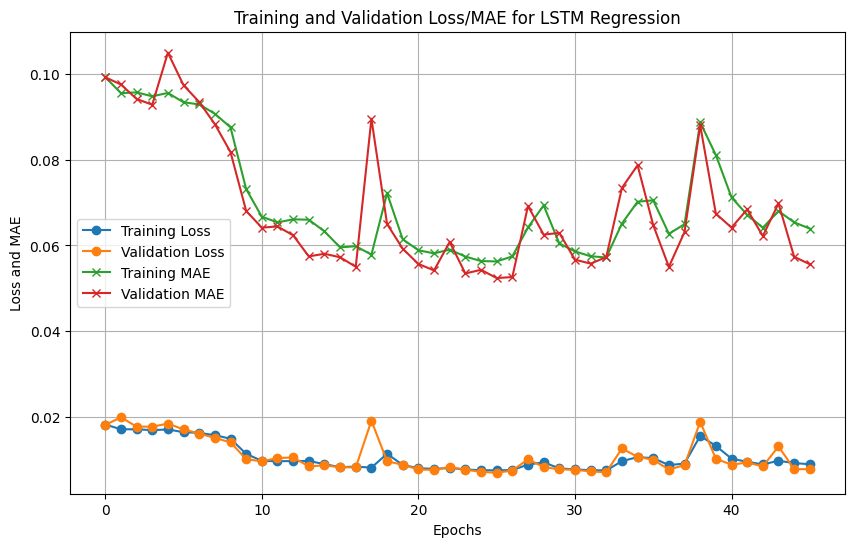

In [4]:
model_task = "lstm_regression"
dataset = "MIT_Stanford"

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, dataset=dataset
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)

lstm_model, history = train_lstm_model(config, X_train, y_train, X_val, y_val)

# Plot the training history
plot_training_history(history, model_task)

## CNN

2025-03-24 08:49:04,646 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.8
2025-03-24 08:49:04,731 - INFO - CNN model built with tuned config: Config(project_name='Experiment1', data_path='data/raw/Degradation_Prediction_Dataset_ISEA.mat', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=120, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=32, lstm_dropout_rate=0.2, lstm_dense_units=16, learning_rate=0.001, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=11, conv2_filters=64, conv2_kernel_size=7, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64, cnn_dropout_rate=0.2)


No tuning file found at experiments/hyperparameter_tuning/Experiment1_cnn_classification_tuning_eol80_best_params.json; using defaults.
Epoch 1/50
476/484 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5480 - loss: 1.2549
Epoch 1: val_loss improved from inf to 1.03273, saving model to experiments/models/cnn_classification_eol80_20250324_084904_best.keras
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5487 - loss: 1.2529 - val_accuracy: 0.6152 - val_loss: 1.0327
Epoch 2/50
480/484 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6361 - loss: 1.0169
Epoch 2: val_loss improved from 1.03273 to 0.88949, saving model to experiments/models/cnn_classification_eol80_20250324_084904_best.keras
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6363 - loss: 1.0165 - val_accuracy: 0.6858 - val_loss: 0.8895
Epoch 3/50
479/484 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6654 - loss: 0.9302
Epoch 3: val_loss did not improve from 0.88949
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy

2025-03-24 08:52:57,096 - INFO - Final CNN model saved to experiments/models/cnn_classification_eol80_20250324_085257_final.keras


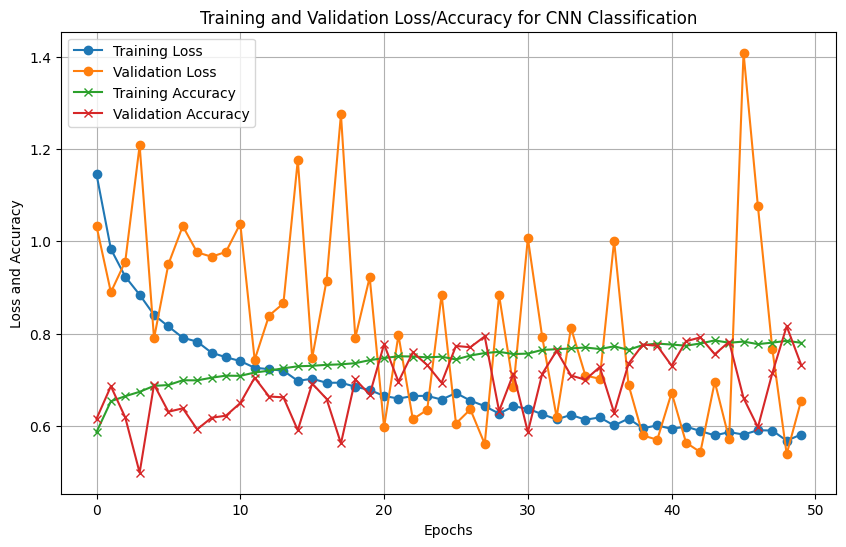

In [3]:
model_task = "cnn_classification"
dataset = "MIT_Stanford"


# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, dataset=dataset
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)

cnn_model, history = train_cnn_model(config, X_train, y_train, X_val, y_val)

# Plot the training history
plot_training_history(history, model_task)